## CLI command `xcube sh gen` 

This Notebook opens and inspects the data cubes generated by the CLI command `xcube sh gen`.
The data cube `cube.zarr` inspected here has been generated using the following command: 

    $ xcube sh gen S2L1C -o cube.zarr -b B08 -g 10.237174,53.506205,10.271174,53.540205 -r 6.640625e-05 -t 2017-08-01,2017-08-31 -p 1D


In [1]:
import xarray as xr

In [13]:
cube = xr.open_zarr('cube.zarr')
cube

<xarray.Dataset>
Dimensions:    (band: 1, bnds: 2, lat: 512, lon: 512, time: 30)
Coordinates:
  * band       (band) <U3 'B08'
  * lat        (lat) float64 53.54 53.54 53.54 53.54 ... 53.51 53.51 53.51 53.51
  * lon        (lon) float64 10.24 10.24 10.24 10.24 ... 10.27 10.27 10.27 10.27
  * time       (time) datetime64[ns] 2017-08-01T12:00:00 ... 2017-08-30T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<shape=(30, 2), chunksize=(30, 2)>
Dimensions without coordinates: bnds
Data variables:
    sh_data    (time, lat, lon, band) float32 dask.array<shape=(30, 512, 512, 1), chunksize=(1, 512, 512, 1)>
Attributes:
    Conventions:               CF-1.7
    title:                     S2L1C Data Cube Subset
    history:                   [{'program_name': 'xcsh', 'program_version': '...
    date_created:              2019-08-03T17:22:16.224628
    processing_level:          L1C
    time_coverage_start:       2017-08-01T00:00:00+00:00
    time_coverage_end:         2017-08-31T00:

In [6]:
cube.B08

<xarray.DataArray 'B08' (time: 30, lat: 512, lon: 512)>
dask.array<shape=(30, 512, 512), dtype=float32, chunksize=(1, 256, 256)>
Coordinates:
  * lat      (lat) float64 53.54 53.54 53.54 53.54 ... 53.51 53.51 53.51 53.51
  * lon      (lon) float64 10.24 10.24 10.24 10.24 ... 10.27 10.27 10.27 10.27
  * time     (time) datetime64[ns] 2017-08-01T12:00:00 ... 2017-08-30T12:00:00

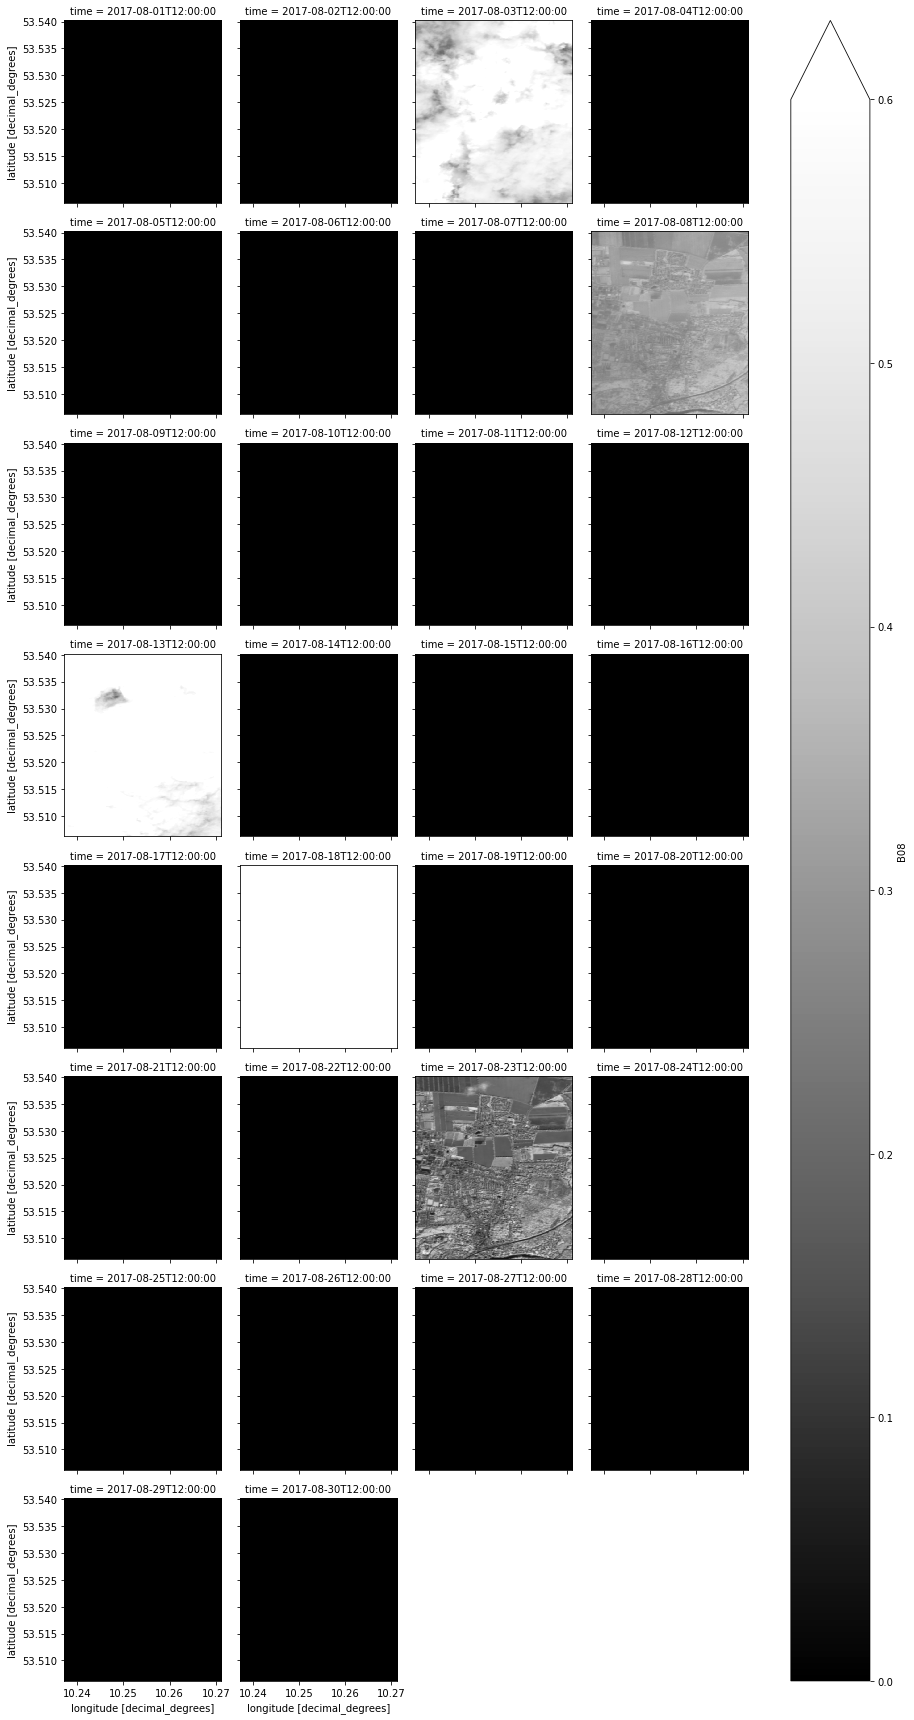

In [12]:
cube.B08.plot.imshow(x='lon', y='lat', col='time', col_wrap=4, vmin=0, vmax=0.6, cmap='Greys_r')

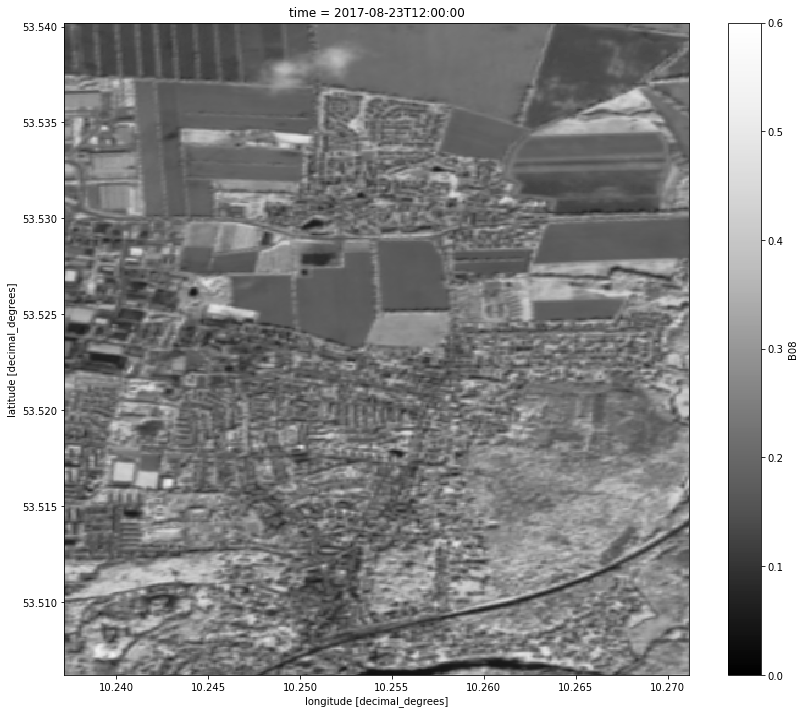

In [8]:
cube.B08.isel(time=22).plot.imshow(vmin=0, vmax=0.6, cmap='Greys_r', figsize=(14, 12))

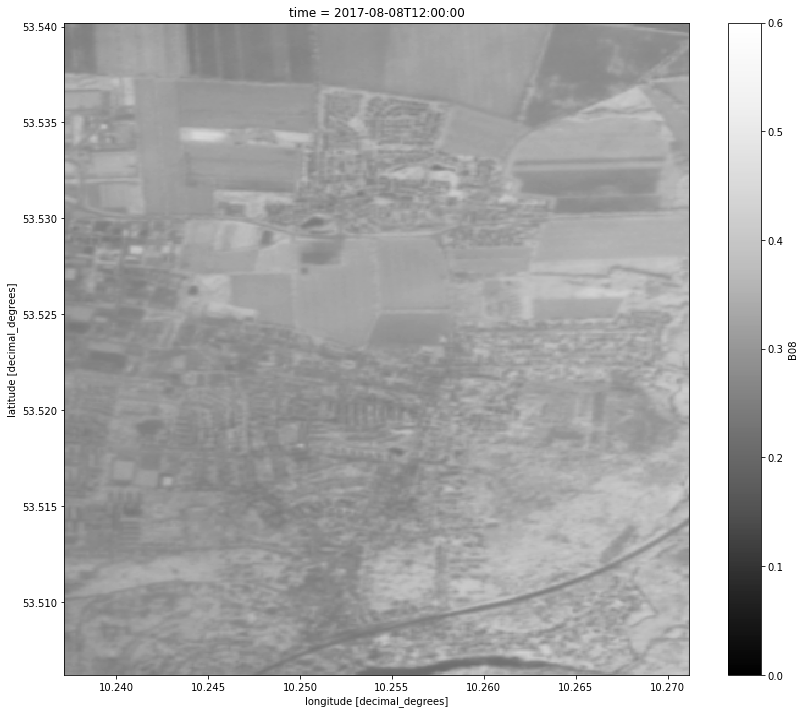

In [9]:
cube.B08.isel(time=7).plot.imshow(vmin=0, vmax=0.6, cmap='Greys_r', figsize=(14, 12))

In [10]:
cube.time

<xarray.DataArray 'time' (time: 30)>
array(['2017-08-01T12:00:00.000000000', '2017-08-02T12:00:00.000000000',
       '2017-08-03T12:00:00.000000000', '2017-08-04T12:00:00.000000000',
       '2017-08-05T12:00:00.000000000', '2017-08-06T12:00:00.000000000',
       '2017-08-07T12:00:00.000000000', '2017-08-08T12:00:00.000000000',
       '2017-08-09T12:00:00.000000000', '2017-08-10T12:00:00.000000000',
       '2017-08-11T12:00:00.000000000', '2017-08-12T12:00:00.000000000',
       '2017-08-13T12:00:00.000000000', '2017-08-14T12:00:00.000000000',
       '2017-08-15T12:00:00.000000000', '2017-08-16T12:00:00.000000000',
       '2017-08-17T12:00:00.000000000', '2017-08-18T12:00:00.000000000',
       '2017-08-19T12:00:00.000000000', '2017-08-20T12:00:00.000000000',
       '2017-08-21T12:00:00.000000000', '2017-08-22T12:00:00.000000000',
       '2017-08-23T12:00:00.000000000', '2017-08-24T12:00:00.000000000',
       '2017-08-25T12:00:00.000000000', '2017-08-26T12:00:00.000000000',
       '2017-0

In [11]:
cube.time.encoding

{'chunks': (30,),
 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0),
 'filters': None,
 'units': 'seconds since 1970-01-01T00:00:00Z',
 'calendar': 'proleptic_gregorian',
 'dtype': dtype('uint64')}

---

Generate a 4D cube using otherwise same arguments: 

    $ xcsh cubify S2L1C -o cube-4d.zarr --4d -b B08 -g 10.237174,53.506205,10.271174,53.540205 -r 6.640625e-05 -t 2017-08-01,2017-08-31 -p 1D


In [20]:
cube_4d = xr.open_zarr('cube-4d.zarr')
cube_4d

<xarray.Dataset>
Dimensions:    (band: 1, bnds: 2, lat: 512, lon: 512, time: 30)
Coordinates:
  * band       (band) <U3 'B08'
  * lat        (lat) float64 53.54 53.54 53.54 53.54 ... 53.51 53.51 53.51 53.51
  * lon        (lon) float64 10.24 10.24 10.24 10.24 ... 10.27 10.27 10.27 10.27
  * time       (time) datetime64[ns] 2017-08-01T12:00:00 ... 2017-08-30T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<shape=(30, 2), chunksize=(30, 2)>
Dimensions without coordinates: bnds
Data variables:
    band_data  (time, lat, lon, band) float32 dask.array<shape=(30, 512, 512, 1), chunksize=(1, 512, 512, 1)>
Attributes:
    Conventions:               CF-1.7
    title:                     S2L1C Data Cube Subset
    history:                   [{'program_name': 'xcsh', 'program_version': '...
    date_created:              2019-08-03T17:40:03.756930
    processing_level:          L1C
    time_coverage_start:       2017-08-01T00:00:00+00:00
    time_coverage_end:         2017-08-31T00:

In [21]:
cube_4d.band_data

<xarray.DataArray 'band_data' (time: 30, lat: 512, lon: 512, band: 1)>
dask.array<shape=(30, 512, 512, 1), dtype=float32, chunksize=(1, 512, 512, 1)>
Coordinates:
  * band     (band) <U3 'B08'
  * lat      (lat) float64 53.54 53.54 53.54 53.54 ... 53.51 53.51 53.51 53.51
  * lon      (lon) float64 10.24 10.24 10.24 10.24 ... 10.27 10.27 10.27 10.27
  * time     (time) datetime64[ns] 2017-08-01T12:00:00 ... 2017-08-30T12:00:00